<a href="https://colab.research.google.com/github/marcelo0211/arquivos/blob/master/Projetod07_MarceloLiraCarvalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install uszipcode
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from uszipcode import SearchEngine
from yellowbrick.features import Rank2D



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [6]:
df= pd.read_csv('/content/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [7]:
#Calcule o preço por área de imóvel
df['preco_area'] = None
#for i, row in dfbra.iterrows():
df['preco_area'] = df['price'] /  df['sqft_living']
df
#df.dtypes

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,preco_area
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,188.050847
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,209.338521
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,233.766234
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,308.163265
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,303.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,235.294118
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,173.160173
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,394.216667
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,250.000000


In [8]:
#Renomeando as colunas 
dfbra = df.rename(columns={'date':'data','price':'preco','bedrooms':'nr_quartos',
                   'bathrooms':'nr_banheiros',
                   'sqft_living':'area_habitável',
                   'sqft_lot':'area_terreno',
                   'floors':'nr_andares',
                   'waterfront':'beira_mar',
                   'view':'beleza_vista_mar',
                   'condition':'condicoes_imovel',
                   'grade':'Class_qualid_mat',
                   'sqft_above':'area_acima_solo',
                   'sqft_basement':'area_abaixo_solo',
                   'yr_built':'ano_construcao',
                   'yr_renovated':'ano_restauracao',
                   'zipcode':'cep',
                   'lat':'latitude',
                   'long':'longitude',
                   'sqft_living15':'med_area_abt15',
                   'sqft_lot15':'med_area_lote_15'})


In [9]:
#Verificar o tipo de registros e ajustar
dfbra.dtypes

id                    int64
data                 object
preco               float64
nr_quartos            int64
nr_banheiros        float64
area_habitável        int64
area_terreno          int64
nr_andares          float64
beira_mar             int64
beleza_vista_mar      int64
condicoes_imovel      int64
Class_qualid_mat      int64
area_acima_solo       int64
area_abaixo_solo      int64
ano_construcao        int64
ano_restauracao       int64
cep                   int64
latitude            float64
longitude           float64
med_area_abt15        int64
med_area_lote_15      int64
preco_area          float64
dtype: object

In [10]:
dfbra.nr_andares = dfbra.nr_andares.astype(int)
dfbra.ano_construcao= dfbra.ano_construcao .astype(str)
dfbra.ano_restauracao= dfbra.ano_restauracao .astype(str)
dfbra.data = dfbra.data.astype(str)



In [11]:
dfbra.dtypes

id                    int64
data                 object
preco               float64
nr_quartos            int64
nr_banheiros        float64
area_habitável        int64
area_terreno          int64
nr_andares            int64
beira_mar             int64
beleza_vista_mar      int64
condicoes_imovel      int64
Class_qualid_mat      int64
area_acima_solo       int64
area_abaixo_solo      int64
ano_construcao       object
ano_restauracao      object
cep                   int64
latitude            float64
longitude           float64
med_area_abt15        int64
med_area_lote_15      int64
preco_area          float64
dtype: object

In [12]:
#Eliminando colunas desnecessarias 
dfbra=dfbra.drop(['latitude','longitude'], axis = 1)
dfbra

,id,data,preco,nr_quartos,nr_banheiros,area_habitável,area_terreno,nr_andares,beira_mar,beleza_vista_mar,condicoes_imovel,Class_qualid_mat,area_acima_solo,area_abaixo_solo,ano_construcao,ano_restauracao,cep,med_area_abt15,med_area_lote_15,preco_area
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,188.050847
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,1690,7639,209.338521
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,98028,2720,8062,233.766234
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,1360,5000,308.163265
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,1800,7503,303.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3,0,0,3,8,1530,0,2009,0,98103,1530,1509,235.294118
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2,0,0,3,8,2310,0,2014,0,98146,1830,7200,173.160173
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2,0,0,3,7,1020,0,2009,0,98144,1020,2007,394.216667
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2,0,0,3,8,1600,0,2004,0,98027,1410,1287,250.000000


In [13]:
# Limpando registro data 'T000000'
dfbra = dfbra.replace('T000000',' ', regex=True)
dfbra

,id,data,preco,nr_quartos,nr_banheiros,area_habitável,area_terreno,nr_andares,beira_mar,beleza_vista_mar,condicoes_imovel,Class_qualid_mat,area_acima_solo,area_abaixo_solo,ano_construcao,ano_restauracao,cep,med_area_abt15,med_area_lote_15,preco_area
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,1340,5650,188.050847
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,1690,7639,209.338521
2,5631500400,20150225,180000.0,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,98028,2720,8062,233.766234
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,1360,5000,308.163265
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,1800,7503,303.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521,360000.0,3,2.50,1530,1131,3,0,0,3,8,1530,0,2009,0,98103,1530,1509,235.294118
21609,6600060120,20150223,400000.0,4,2.50,2310,5813,2,0,0,3,8,2310,0,2014,0,98146,1830,7200,173.160173
21610,1523300141,20140623,402101.0,2,0.75,1020,1350,2,0,0,3,7,1020,0,2009,0,98144,1020,2007,394.216667
21611,291310100,20150116,400000.0,3,2.50,1600,2388,2,0,0,3,8,1600,0,2004,0,98027,1410,1287,250.000000


In [14]:
#Definindo a coluna cidade de acordo com o CEP Encontre a cidade de cada imóvel

engine = SearchEngine()
dfbra['cidade']= None
for i,row in dfbra.iterrows():
  zipcode = engine.by_zipcode(df['zipcode'][i])
  dfbra['cidade'][i] = zipcode.major_city

dfbra  


<ipython-input-14-f140ca445c95>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbra['cidade'][i] = zipcode.major_city


,id,data,preco,nr_quartos,nr_banheiros,area_habitável,area_terreno,nr_andares,beira_mar,beleza_vista_mar,...,Class_qualid_mat,area_acima_solo,area_abaixo_solo,ano_construcao,ano_restauracao,cep,med_area_abt15,med_area_lote_15,preco_area,cidade
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,1340,5650,188.050847,Seattle
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,1690,7639,209.338521,Seattle
2,5631500400,20150225,180000.0,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,2720,8062,233.766234,Kenmore
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,1360,5000,308.163265,Seattle
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,1800,7503,303.571429,Sammamish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521,360000.0,3,2.50,1530,1131,3,0,0,...,8,1530,0,2009,0,98103,1530,1509,235.294118,Seattle
21609,6600060120,20150223,400000.0,4,2.50,2310,5813,2,0,0,...,8,2310,0,2014,0,98146,1830,7200,173.160173,Seattle
21610,1523300141,20140623,402101.0,2,0.75,1020,1350,2,0,0,...,7,1020,0,2009,0,98144,1020,2007,394.216667,Seattle
21611,291310100,20150116,400000.0,3,2.50,1600,2388,2,0,0,...,8,1600,0,2004,0,98027,1410,1287,250.000000,Issaquah


In [60]:
agrupado = dfbra.groupby('preco')['Class_qualid_mat'].sum()

agrupado.to_excel('c:\dnc\agrupado.xlsx')

 
 
         
  

In [11]:
dfbra.to_csv('c:\dnc\home.csv')

In [68]:
#FIM DO AJUSTE E LIMPEZA DE DADOS 
# INICIO DA ANALISE DADOS 
#Trabalhando com a CORRELACAO
dfbra=dfbra.drop(['id','cep',], axis = 1)

lista_corr = dfbra.corr()
lista_corr

,preco,nr_quartos,nr_banheiros,area_habitável,area_terreno,nr_andares,beira_mar,beleza_vista_mar,condicoes_imovel,Class_qualid_mat,area_acima_solo,area_abaixo_solo,med_area_abt15,med_area_lote_15,preco_area
preco,1.000000,0.308350,0.525138,0.702035,0.089661,0.237211,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.585379,0.082447,0.554703
nr_quartos,0.308350,1.000000,0.515884,0.576671,0.031703,0.155643,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.391638,0.029244,-0.206069
nr_banheiros,0.525138,0.515884,1.000000,0.754665,0.087740,0.519019,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.568634,0.087175,-0.091421
area_habitável,0.702035,0.576671,0.754665,1.000000,0.172826,0.353321,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.756420,0.183286,-0.092314
area_terreno,0.089661,0.031703,0.087740,0.172826,1.000000,-0.008951,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.144608,0.718557,-0.033822
nr_andares,0.237211,0.155643,0.519019,0.353321,-0.008951,1.000000,0.019640,0.024658,-0.293173,0.472608,0.517913,-0.235836,0.296561,-0.013252,-0.025569
beira_mar,0.266369,-0.006582,0.063744,0.103818,0.021604,0.019640,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,0.086463,0.030703,0.193215
beleza_vista_mar,0.397293,0.079532,0.187737,0.284611,0.074710,0.024658,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,0.280439,0.072575,0.220932
condicoes_imovel,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.293173,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.092824,-0.003406,0.102345
Class_qualid_mat,0.667434,0.356967,0.664983,0.762704,0.113621,0.472608,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.713202,0.119248,0.122758


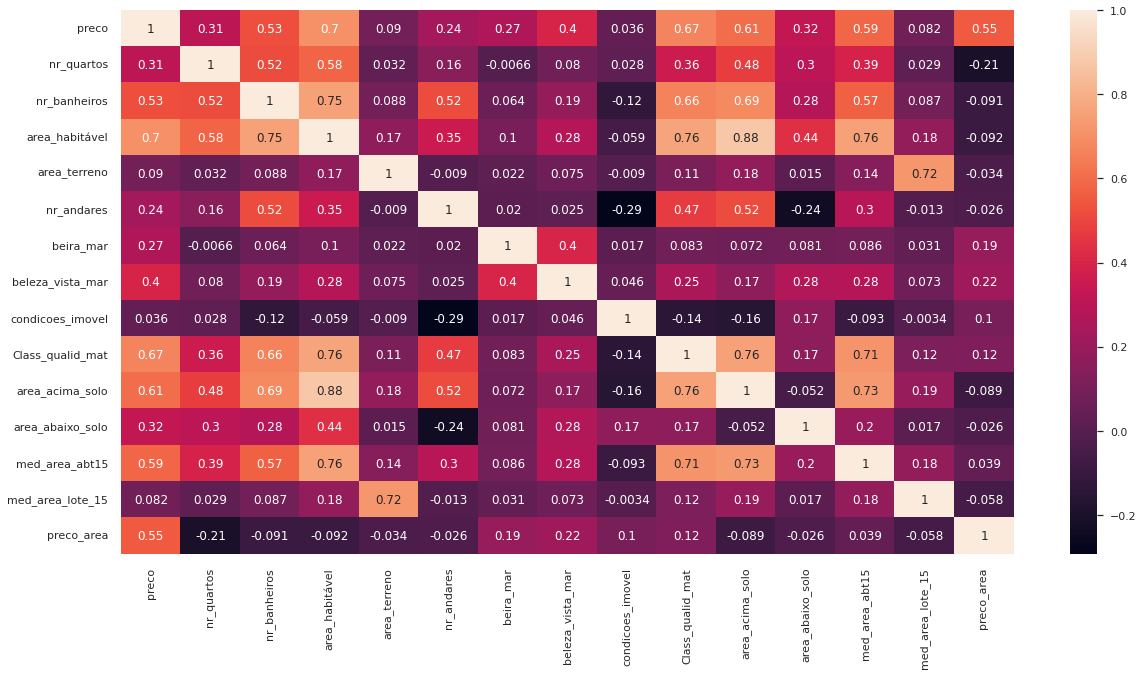

In [69]:
#Usando o Grafico para Correlacao - MAPA DE CALOR- 
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(dfbra.corr(), annot = True);



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0878a6bb80>,
      dtype=object)

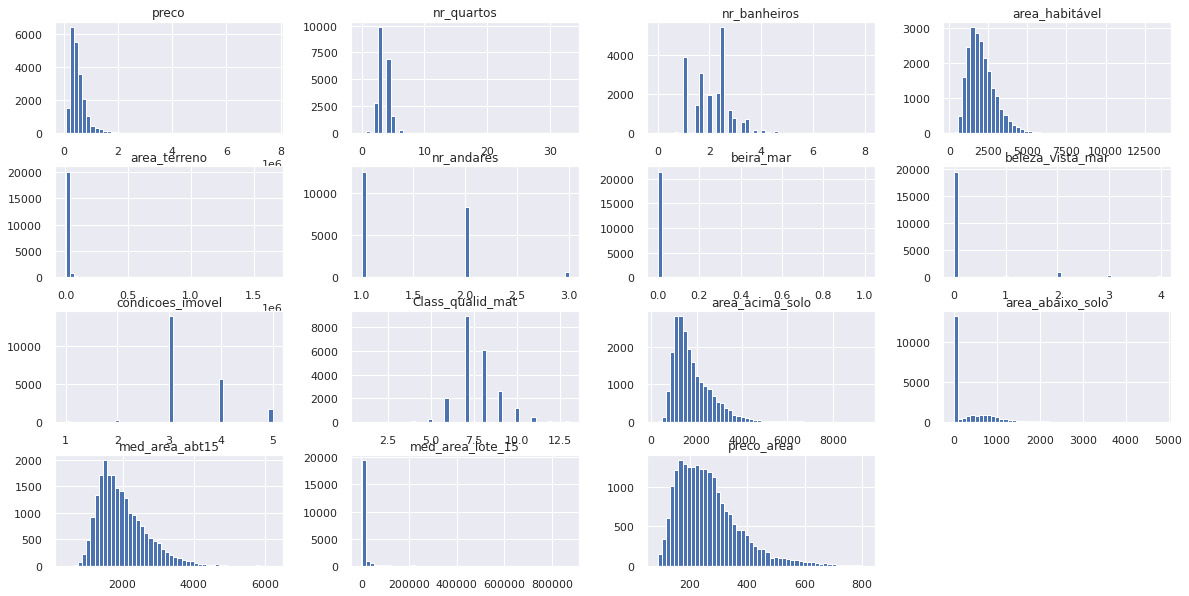

In [76]:
#dfbra[lista_corr].hist(bins=15,figsize=(25,15));
dfbra.hist(by=None, grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, ax=None, sharex=False, sharey=False, figsize=None, layout=None, bins=50, backend=None, legend=False)

In [23]:
dfbra.describe().T.sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
beira_mar,21613.0,0.007542,0.086517,0.000000,0.000000,0.00000,0.000000,1.000000e+00
beleza_vista_mar,21613.0,0.234303,0.766318,0.000000,0.000000,0.00000,0.000000,4.000000e+00
nr_andares,21613.0,1.446213,0.551894,1.000000,1.000000,1.00000,2.000000,3.000000e+00
nr_banheiros,21613.0,2.114757,0.770163,0.000000,1.750000,2.25000,2.500000,8.000000e+00
nr_quartos,21613.0,3.370842,0.930062,0.000000,3.000000,3.00000,4.000000,3.300000e+01
condicoes_imovel,21613.0,3.409430,0.650743,1.000000,3.000000,3.00000,4.000000,5.000000e+00
Class_qualid_mat,21613.0,7.656873,1.175459,1.000000,7.000000,7.00000,8.000000,1.300000e+01
preco_area,21613.0,264.156594,110.060793,87.588235,182.291667,244.64455,318.322981,8.101389e+02
area_abaixo_solo,21613.0,291.509045,442.575043,0.000000,0.000000,0.00000,560.000000,4.820000e+03
area_acima_solo,21613.0,1788.390691,828.090978,290.000000,1190.000000,1560.00000,2210.000000,9.410000e+03


In [ ]:
#describe = dfbra.describe().T.sort_values(by='mean')

In [21]:
#describe.to_excel('c:\dnc\describe.xlsx')

In [19]:
#dfbra.describe().to_excel('c:\dnc\home1.xlsx')